<a href="https://colab.research.google.com/github/Rajendramahesh/titanic-dataset/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [246]:
ds=pd.read_csv("titanic.csv")
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [248]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [249]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
ds["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


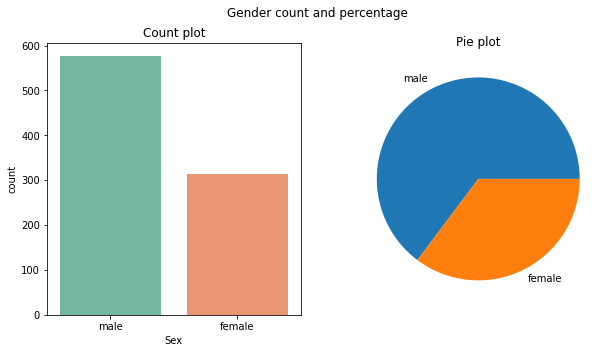

In [256]:
fig, axes = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Gender count and percentage')
axes[0].set_title("Count plot")
sns.countplot(x="Sex",data=ds,ax=axes[0], palette = "Set2" )


axes[1].set_title("Pie plot")
gen={"male":sum(ds["Sex"]=="male"),"female":sum(ds["Sex"]=="female")}
gen_d=pd.DataFrame(gen,index=[1])
axes[1].pie(gen_d, labels =gen_d.columns,)
plt.show()

In [262]:
 

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import LabelEncoder

#smiple encoding class
class Encoder(BaseEstimator, TransformerMixin):
  def __init__(self,df,names):
    self.df=df
    self.names=names

  def fit(self,df,y=None):
    return self

  def transform(self,df):
    le = LabelEncoder()
    #names=["Sex","Embarked"]
    for name in self.names:
      df[name]=le.fit_transform(df[name])
    return df



In [263]:
"""en=Encoder(ds,["Sex","Embarked"])
df=en.fit_transform(ds)                 

df.head()"""

'en=Encoder(ds,["Sex","Embarked"])\ndf=en.fit_transform(ds)\n\ndf.head()'

In [264]:
from sklearn.impute import SimpleImputer
#imputing with mean class
class Imputer(BaseEstimator, TransformerMixin):
  def __init__(self,df,names):
    self.df=df
    self.names=names
  def fit(self,df,y=None):
    return self
  def transform(self,df):
    imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
   # names=["Age"]
    for name in self.names:
      df[name]=imputer.fit_transform(df[name].values.reshape(-1,1))
    return df

                        

In [265]:
"""imp=Imputer(df,["Age"])

df=imp.fit_transform(df)

df["Age"].isna().sum()"""

'imp=Imputer(df,["Age"])\n\ndf=imp.fit_transform(df)\n\ndf["Age"].isna().sum()'

In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [267]:
numeric_transformer = Pipeline(steps=[('imputer',Imputer(ds,["Age"]))]) #numeric_pipe

categorical_transformer = Pipeline(steps=[ ('encoder', Encoder(ds,["Sex","Embarked"]))]) #cat_pipe


In [268]:
ds=numeric_transformer.fit_transform(categorical_transformer.fit_transform(ds))
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


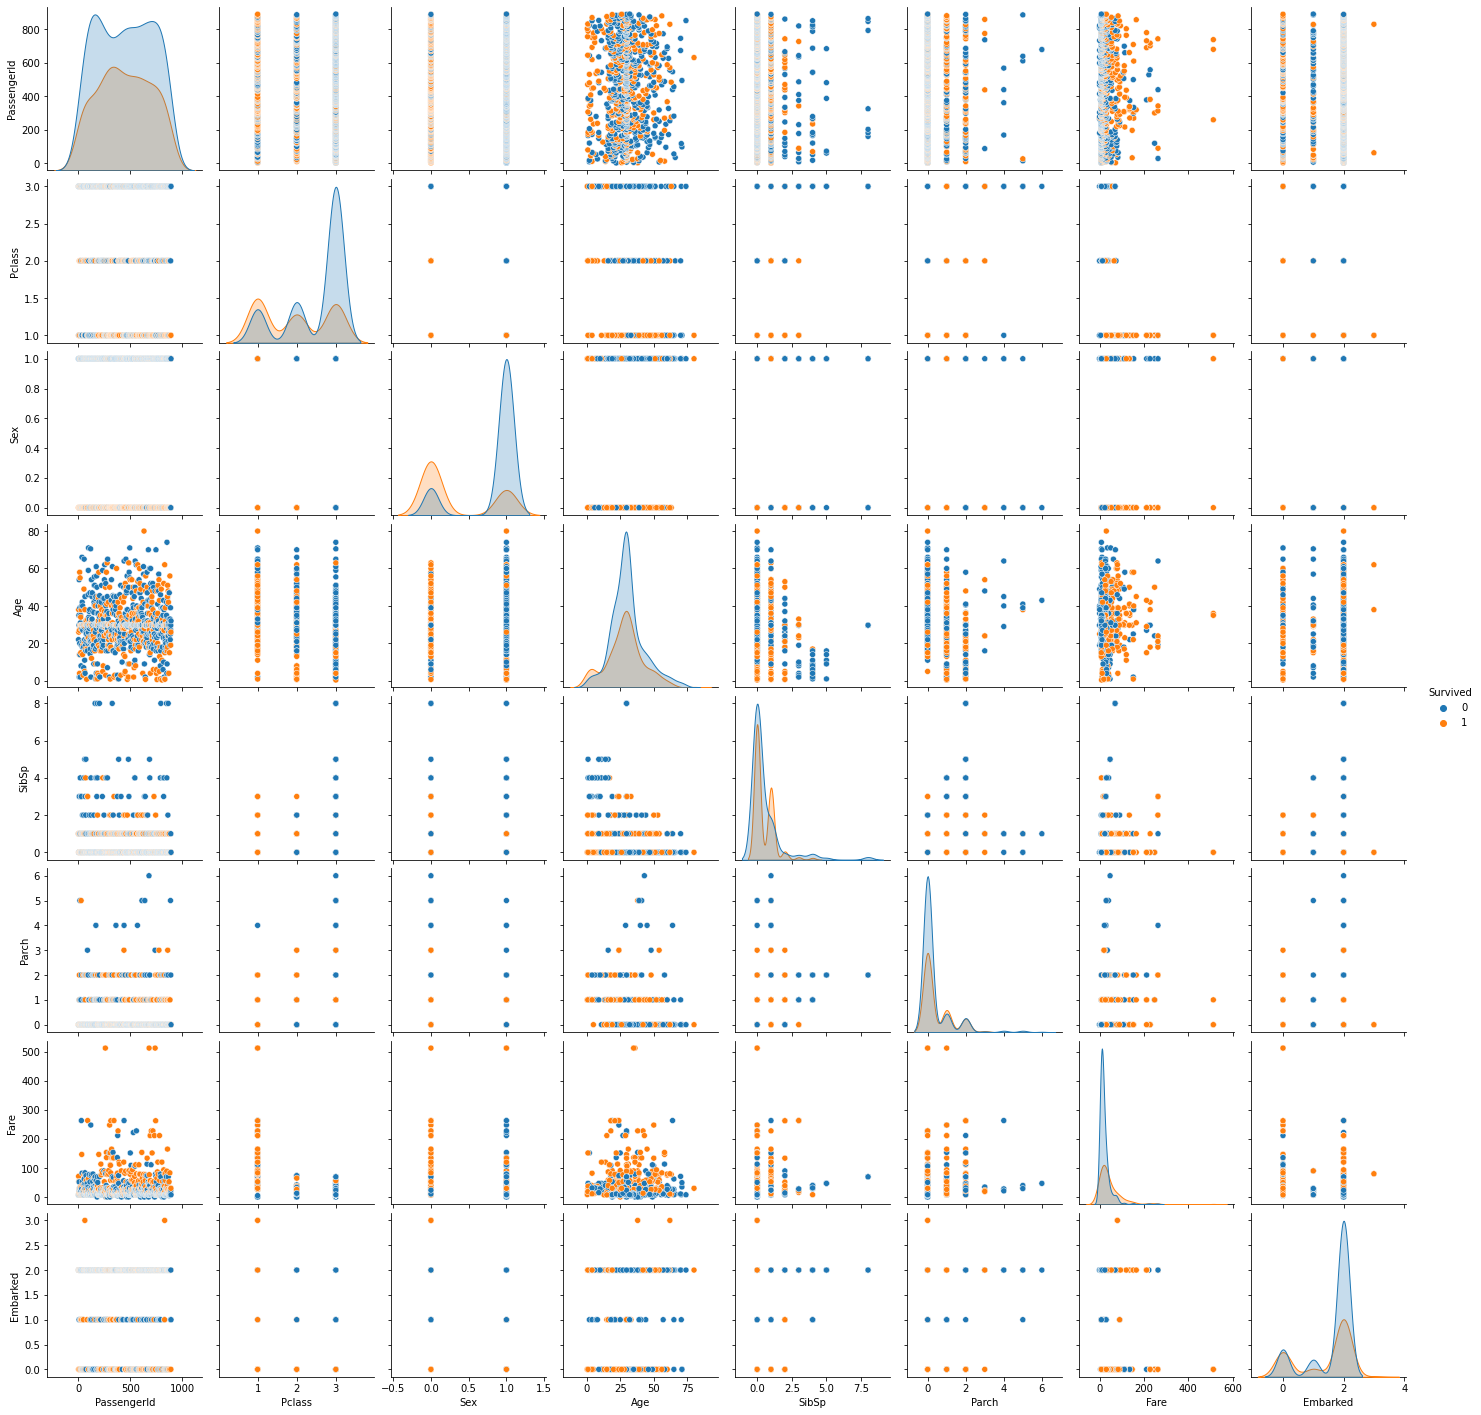

In [302]:

sns.pairplot(ds, hue ='Survived')
#plt.show()

# Pearson Correlation

In [279]:
#Pearson Correlation
corrmat=ds.corr()
corrmat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


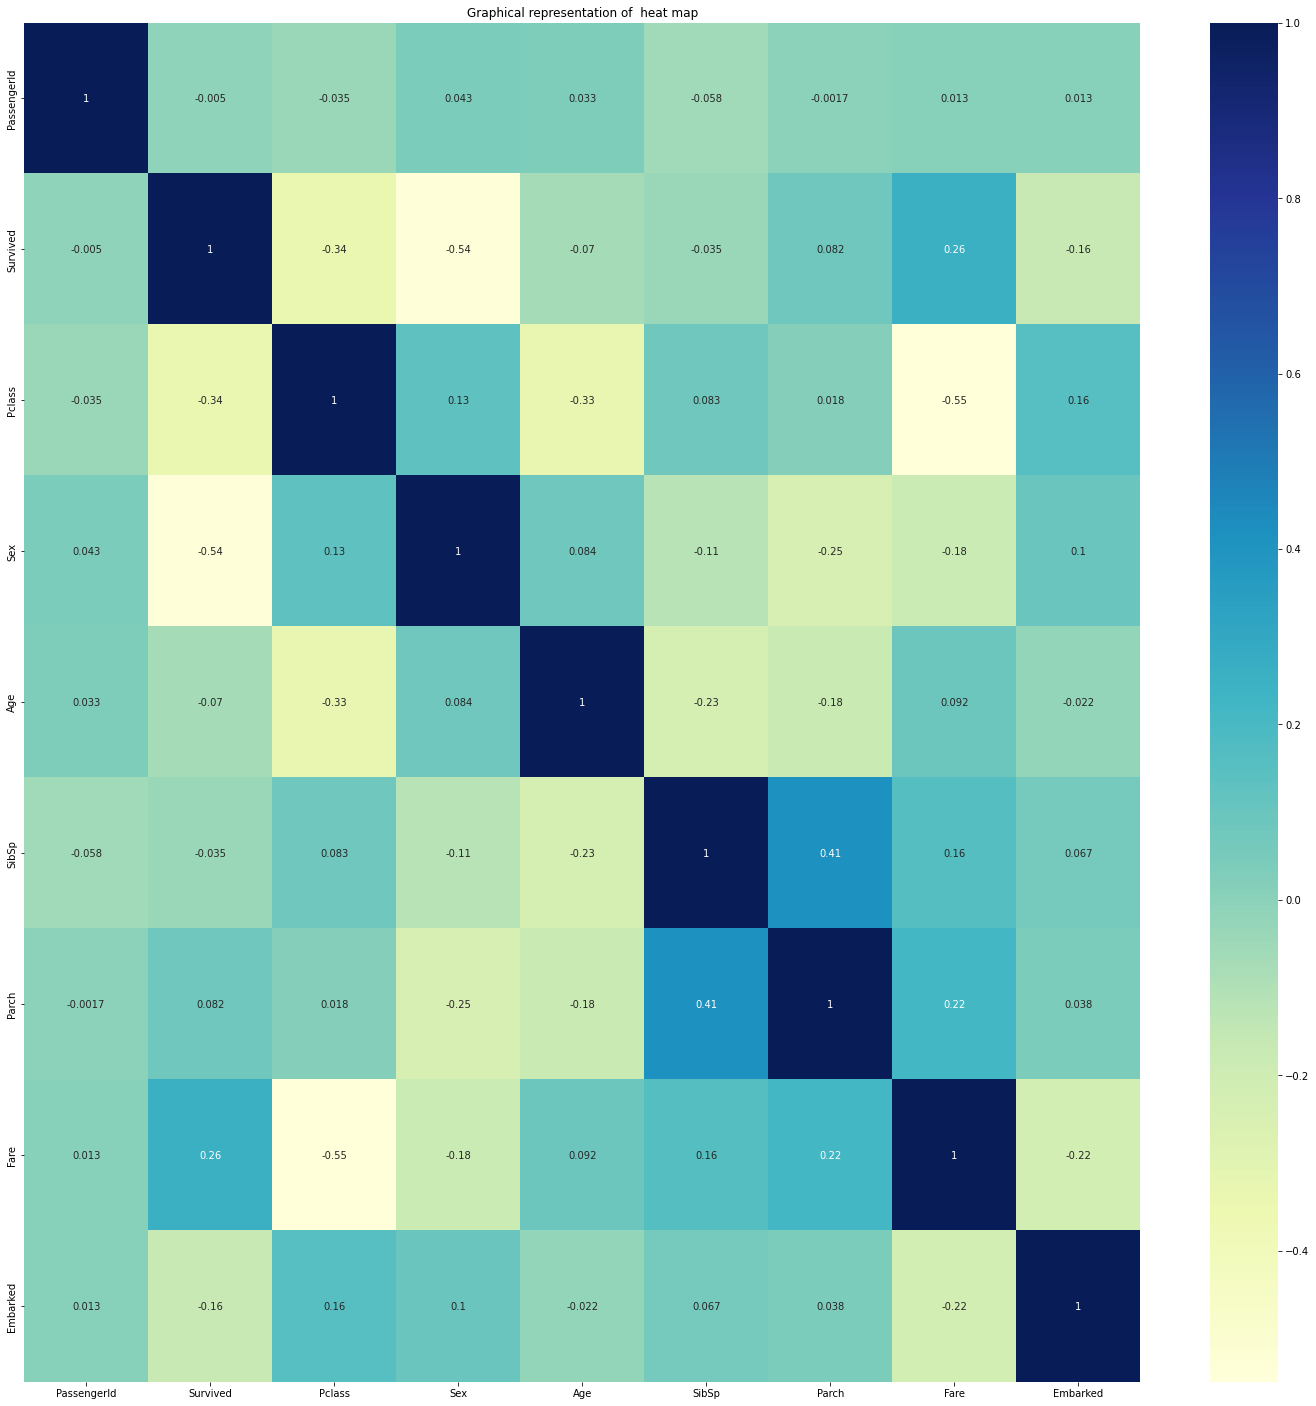

In [283]:
#plot heat map for graphical representation of above correlations
plt.figure(figsize=(25,25))
plt.title('Graphical representation of  heat map')
sns.heatmap(corrmat,annot=True,cmap="YlGnBu")

In [222]:
numeric_features=["Age"]
categorical_features=["Sex","Embarked"]
#combining 2 pipies with help of ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('numeric', numeric_transformer, numeric_features),
                                               ('categorical', categorical_transformer, categorical_features)]) 


In [223]:
from sklearn.ensemble import RandomForestRegressor 
pipeline = Pipeline(steps = [                                   #main pipeline
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor(n_estimators=300 ,max_depth=10)) ])

In [224]:
from sklearn.model_selection import train_test_split
X = ds.drop('Survived',axis=1)
y = ds["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [278]:
rf_model = pipeline.fit(X_train, y_train) #fitting a pipeline model
print (rf_model)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   Imputer(df=     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. L

## **ROC curve**

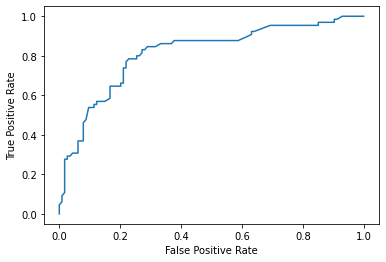

In [297]:
from sklearn import metrics

predictions = rf_model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,predictions  )

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
